# PPO
---

### 1. Import the Necessary Packages

In [1]:
from model.ppo_3 import PPO
from env.wrappers import LunarContinuous, LunarLanderWithUnknownWind,LunarLanderWithKnownWind
from utils.logger import WandbSummaryWritter
import torch

### 2. Instantiate the Model

Setup the hyperparameters in the code cell below.

In [2]:
# hyperparameters = {
#     'timesteps_per_batch': 1024 ,                # Number of timesteps to run per batch
#     'max_timesteps_per_episode': 1200,           # Max number of timesteps per episode
#     'n_updates_per_iteration': 5,                # Number of times to update actor/critic per iteration
#     'lr': 2.5e-4 ,                                # Learning rate of actor optimizer
#     'gamma': 0.95,                               # Discount factor to be applied when calculating Rewards-To-Go
# }
# hyperparameters = {'gamma': 0.999, 'lr_gamma': 0.995,
#                    'max_timesteps_per_episode': 1200,'lr': 0.005 }

hyperparameters = {}

misc_hyperparameters = {
    'env': LunarLanderWithKnownWind
}

Initialise wandb session in the code cell below.

In [3]:
LOG = False
if LOG:
    logger = WandbSummaryWritter(project='lunar', config =misc_hyperparameters['env']().load_hyperparameters())
else:
    logger=None

Initialise the model fo the desired timestamps. Alternatively can specify a checkpoint to continue training.

In [18]:
checkpoint = 'wandb/run-20250110_180810-fl2v6ixe/files'
LOAD_MODEL = False

ppo = PPO(logger, **hyperparameters, **misc_hyperparameters)

if LOAD_MODEL:
    ppo.policy.load_state_dict(torch.load(checkpoint + "/base_model.pth"))
    ppo.adpt_module.load_state_dict(torch.load(checkpoint + "/adp_model.pth"))
    ppo.adapt_policy.set_policy(ppo.policy)

### 3. Train the Model

Train model for specified amount of timestamps.

In [19]:
ppo.train()


-------------------- Iteration #1 --------------------
Average Episodic Return: -335.06
Average Actor Loss: -0.04974
Average Critic Loss: 1776.8240847074069
Average KL Divergence: 0.03877983652771666
Iteration took: 6.34 secs, of which rollout took 5.28 secs and gradient updates took 1.06 secs
Current actor learning rate: 0.005
Current critic learning rate: 0.005
------------------------------------------------------


-------------------- Iteration #2 --------------------
Average Episodic Return: -323.21
Average Actor Loss: -0.11526
Average Critic Loss: 1394.090422116793
Average KL Divergence: 0.04319453998379266
Iteration took: 6.59 secs, of which rollout took 4.98 secs and gradient updates took 1.09 secs
Current actor learning rate: 0.005
Current critic learning rate: 0.005
Average Validation Return: -487.88
Average Validation Duration: 108.2 secs
------------------------------------------------------


-------------------- Iteration #1 --------------------
Average adp Loss: 110.10

### 4. Evaluate the Model

Run multiple episodes from pretrained model.

In [20]:
# ppo.validate(val_iter=30)
ppo.device = 'cpu'
import numpy as np
# val_rews, val_dur = ppo.validate(10, False, True, False)
# ppo.test()

wind_vals, base_z, adpt_z = ppo.validate_encoders_single_rollout()

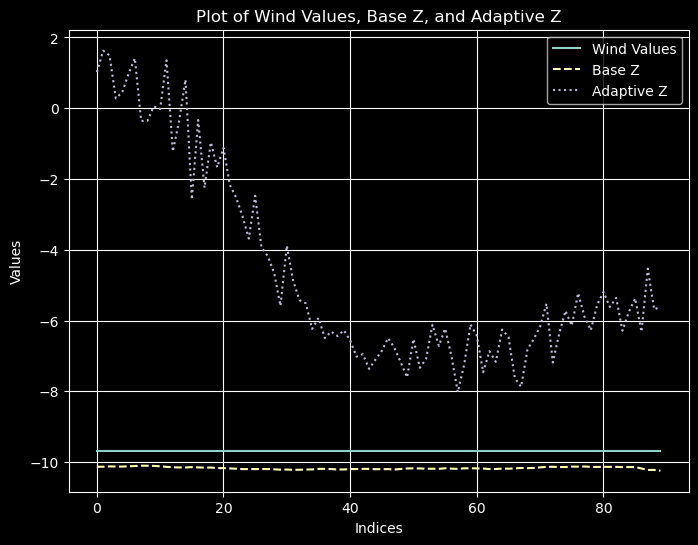

In [29]:
import matplotlib.pyplot as plt
indices = range(len(wind_vals))

plt.figure(figsize=(8, 6))
plt.plot(indices, wind_vals, label="Wind Values")
plt.plot(indices, base_z, label="Base Z", linestyle='--')
plt.plot(indices, adpt_z, label="Adaptive Z", linestyle=':')

plt.xlabel("Indices")
plt.ylabel("Values")
plt.title("Plot of Wind Values, Base Z, and Adaptive Z")
plt.legend()
plt.grid(True)

plt.show()